# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [3]:
lr_gdp_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()
lr_gdp_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

a. What coefficients do you get? Interpret the meaning of these coefficents.

Our increase will be 0.2677(Year) starting at -468.138 on the Life Expectancy.

b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [4]:
gdp_after_1990 = gdp_le[gdp_le['Year'] > 1990]

In [23]:
lr_gdp_after_1990= smf.ols("Life_Expectancy ~ Year", data=gdp_after_1990).fit()
lr_gdp_after_1990.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     392.3
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           2.54e-84
Time:                        14:20:27   Log-Likelihood:                -19406.
No. Observations:                5357   AIC:                         3.882e+04
Df Residuals:                    5355   BIC:                         3.883e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -469.4324     27.191    -17.264      0.000    -522.737    -416.128
Year           0.2684      0.014     19.807      0.000       0.242       0.295
==============================================================================
Omnibus:                      376.889   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.066
Skew:                          -0.710   Prob(JB):                    5.62e-100
Kurtosis:                       2.831   Cond. No.                     4.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In 1990, Our increase will be 0.2683(Year) starting at -469.432 on the Life Expectancy. Which I beleive is statistically signifigant. 

c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [14]:
gdp_le_mean = gdp_le['Life_Expectancy'].mean()
gdp_after_1990_mean = gdp_after_1990['Life_Expectancy'].mean()

In [15]:
print(f' The actual mean life expectancy per year is {gdp_le_mean} years old.')
print(f' The actual mean life expectancy per year is {gdp_after_1990_mean} years old.')

 The actual mean life expectancy per year is 69.01011528644356 years old.
 The actual mean life expectancy per year is 69.12714624129815 years old.


d. Plot the actual values against your model's estimates for the mean life expectancy.

In [ ]:
lm = smf.ols('speed ~ year', data = derby).fit()
lm.summary()

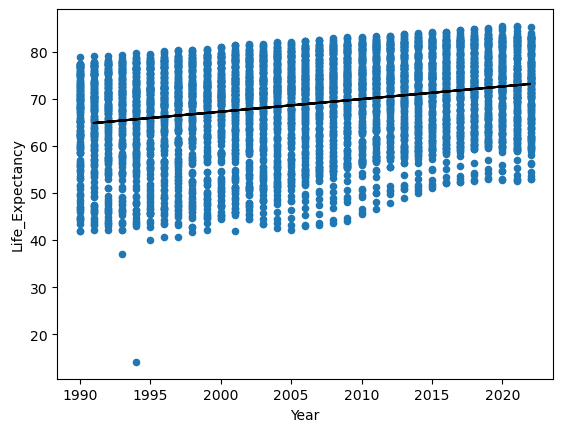

In [24]:
gdp_le.plot(x = 'Year', y = 'Life_Expectancy', kind = 'scatter')
plt.plot(gdp_after_1990['Year'], lr_gdp_after_1990.fittedvalues, color = 'black');

e. Inspect the R-squared value for the model. does it make sense, given the plot?

### Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [31]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463


In [37]:
lr_gdp_2021= smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

a. What coefficients do you get? Interpret the meaning of those coefficients.

Our increase will be 0.000257 starting at 65.949 on the Life Expectancy.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [42]:
lr_gdp_2021_dollars= smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp_2021_dollars.params
#where do the dollar amounts come from?

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

c. Are the coefficients statistically significant?

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000?

e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

### Now, fit a model for life expectancy based on the log of gdp per capita.

a. Inspect the coefficients for this model. Are they statistically significant? 

b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? What about for those with a gdp per capita of $100,000? 

c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

### Finally, return to the full dataset.

a. First, fit a linear regression model for life expectancy based on the log of gdp per capita. 

b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?